In [2]:
import EOSgenerators.crust_EOS as crust
import EOSgenerators.RMF_EOS as RMF
import EOSgenerators.Polytrope_EOS as Polytrope
import EOSgenerators.Strangeon_EOS as Strangeon
import TOVsolver.main as main
import matplotlib.pyplot as plt
import numpy as np
import math
from TOVsolver.unit import g_cm_3, dyn_cm_2, km, Msun, MeV, fm

In [4]:
gmcm3_to_dyncm2 = 8.987490885e20

In [12]:
EOS = np.loadtxt("EOS1_data.txt")

rho1= EOS[:,0] * g_cm_3
P1=EOS[:,1] *dyn_cm_2

# Remove duplicates while keeping the first occurrence
unique_indices = np.unique(rho1, return_index=True)[1]
unique_indices = np.sort(unique_indices)  # Ensure order is preserved
rho1_new = rho1[unique_indices]
P1_new = P1[unique_indices]

print(f"After removing duplicates, rho1 shape: {rho1.shape}, P1 shape: {P1.shape}")


After removing duplicates, rho1 shape: (1185,), P1 shape: (1185,)


In [14]:
MR_EOS = main.OutputMR("",rho1_new,P1_new).T
MRT_EOS = main.OutputMRT("",rho1_new,P1_new).T

In [18]:
print(EOS)

[[1.031700e+04 9.539300e+18          nan]
 [1.047100e+05 5.337900e+20          nan]
 [1.045700e+06 2.324100e+22          nan]
 ...
 [3.229956e+15 1.773337e+36 7.382564e-01]
 [3.276202e+15 1.804035e+36 7.388728e-01]
 [3.322818e+15 1.835003e+36 7.394892e-01]]


In [20]:
print(MR_EOS[0]/Msun)

[0.12088303 0.12347779 0.12709167 0.13166017 0.13711829 0.14346275
 0.15065073 0.16466666 0.20020317 0.25486325 0.31078621 0.36400258
 0.4401862  0.55900617 0.70782728 0.89557054 1.12244383 1.37730323
 1.60898283 1.80823679 1.97788086 2.12161227 2.24284702 2.34474289
 2.43000959 2.50045882 2.55778697 2.60399494 2.64071558 2.66934179
 2.69102533 2.70673183 2.71727826 2.72336183 2.72556706 2.72441234
 2.72033082 2.71369953 2.7048534  2.69407975 2.68162796 2.66772606
 2.65257301 2.63633936 2.6191815  2.60123673 2.58263577 2.56349401
 2.54394226 2.52413913]


In [22]:
print(MR_EOS[1]/km)

[40.61127543 35.35694615 31.11147381 27.61982322 24.63465334 23.06627274
 21.0627226  18.78656351 15.87086105 14.20813321 13.49368804 12.9390998
 12.53359129 12.32689696 12.31908795 12.47361309 12.684147   12.93819633
 13.1368329  13.30318424 13.41040201 13.48975978 13.51955875 13.52543981
 13.5095758  13.48319839 13.43473153 13.37458565 13.30471966 13.22822501
 13.14660069 13.0609117  12.97172657 12.87996983 12.78621744 12.69118362
 12.59527799 12.49884051 12.40232343 12.30633903 12.21064842 12.11600168
 12.0223478  11.92949694 11.83773575 11.74710018 11.65811159 11.57078437
 11.48089324 11.39868031]


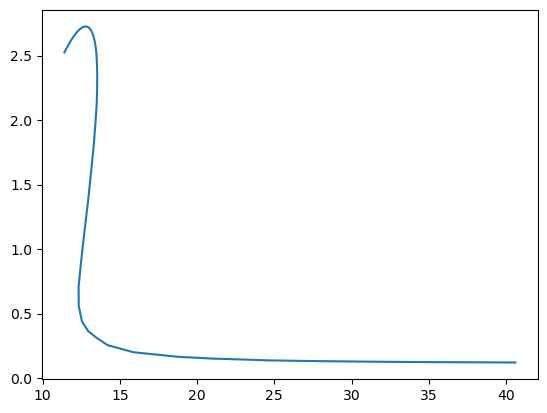

In [16]:
plt.plot(MR_EOS[1]/km,MR_EOS[0]/Msun)
plt.show()

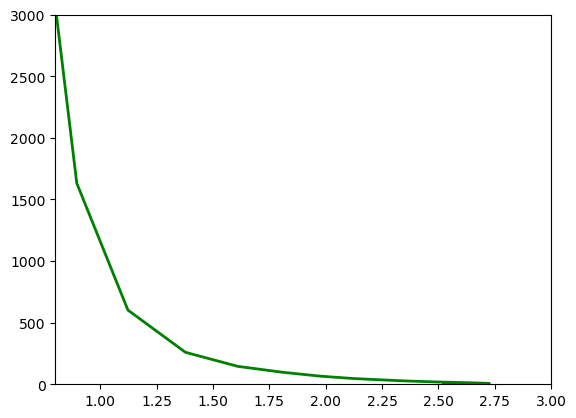

In [26]:
plt.plot(MRT_EOS[1]/Msun, MRT_EOS[2] ,'g-', lw=2,label ="MS1")
plt.ylim([0,3000])
plt.xlim([0.8,3])
plt.show()

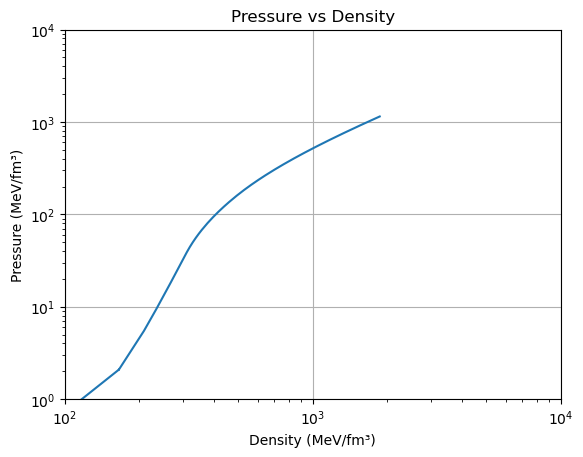

In [28]:
# Plotting
plt.plot( EOS[:,0]/(1.7827e12), EOS[:,1]/(1.6022e33))
plt.xlabel('Density (MeV/fm³)')
plt.ylabel('Pressure (MeV/fm³)')
plt.title('Pressure vs Density')
plt.xscale("log")
plt.yscale("log")
plt.xlim([10**2,10**4])
plt.ylim([10**0,10**4])
plt.grid(True)
#plt.legend()
plt.show()